In [21]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [110]:
data_test = pd.read_csv('test.csv')
data_train = pd.read_csv('train.csv')

In [111]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [112]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [113]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [114]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [115]:
total = data_train.isnull().sum().sort_values(ascending=False)
percent_1 = data_train.isnull().sum()/data_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

In [116]:
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


In [117]:
total = data_test.isnull().sum().sort_values(ascending=False)
percent_1 = data_test.isnull().sum()/data_test.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

In [118]:
missing_data

,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
Embarked,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


/Users/egorkuprasin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

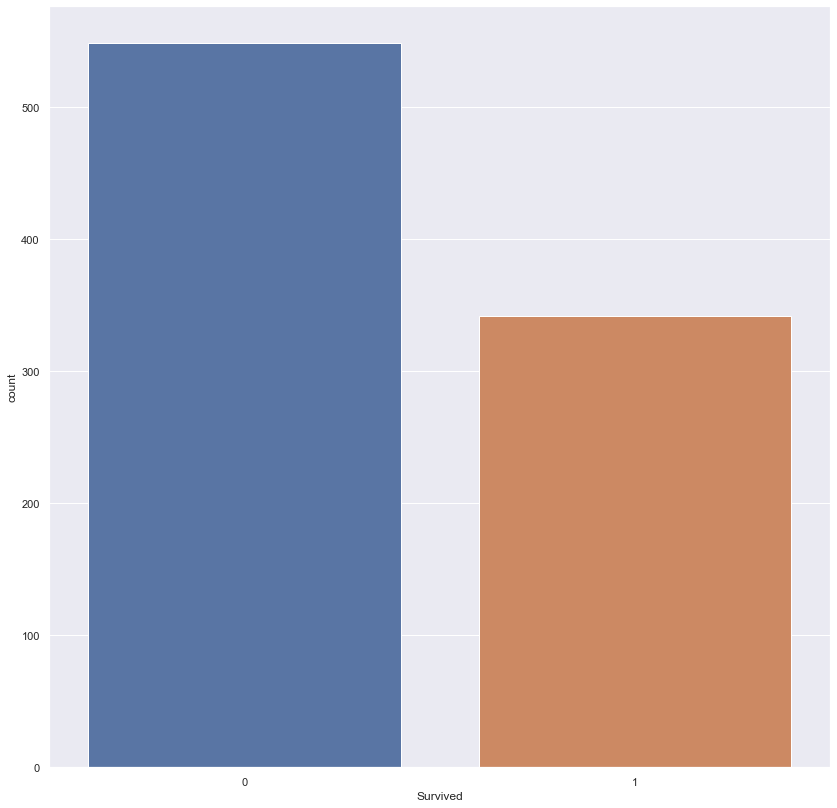

In [119]:
sns.countplot(data_train['Survived'])

/Users/egorkuprasin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

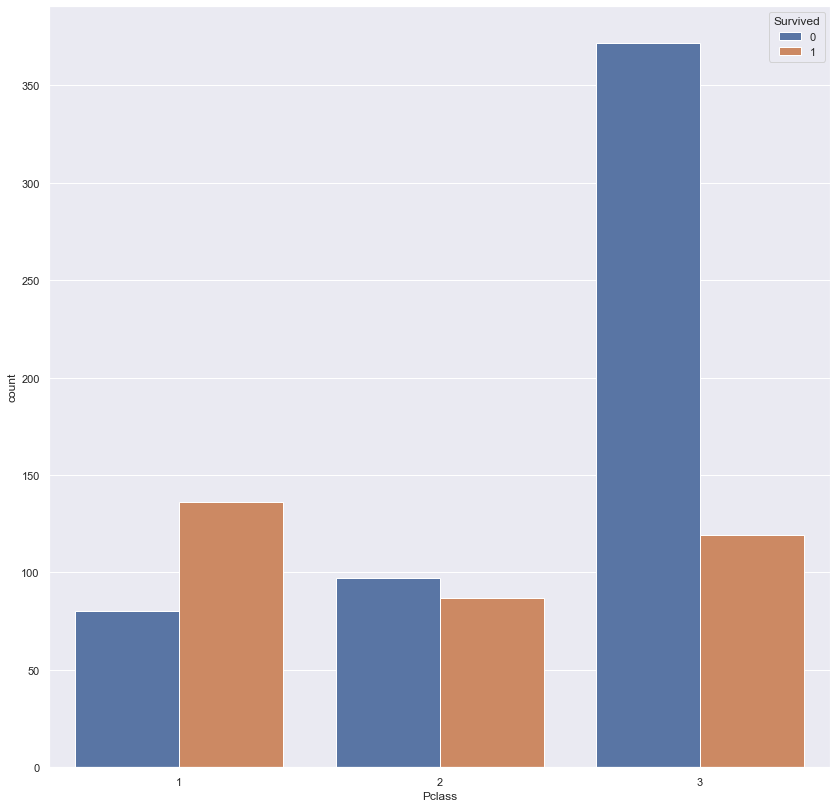

In [120]:
sns.countplot(data_train['Pclass'], hue=data_train['Survived'])

/Users/egorkuprasin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

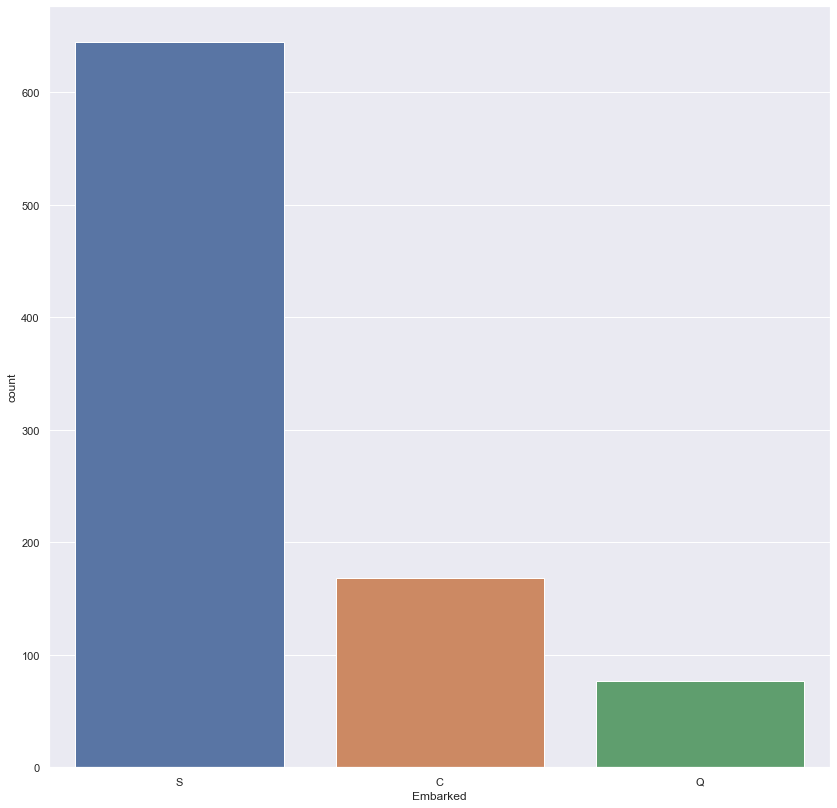

In [121]:
sns.countplot(data_train['Embarked'])

<AxesSubplot:>

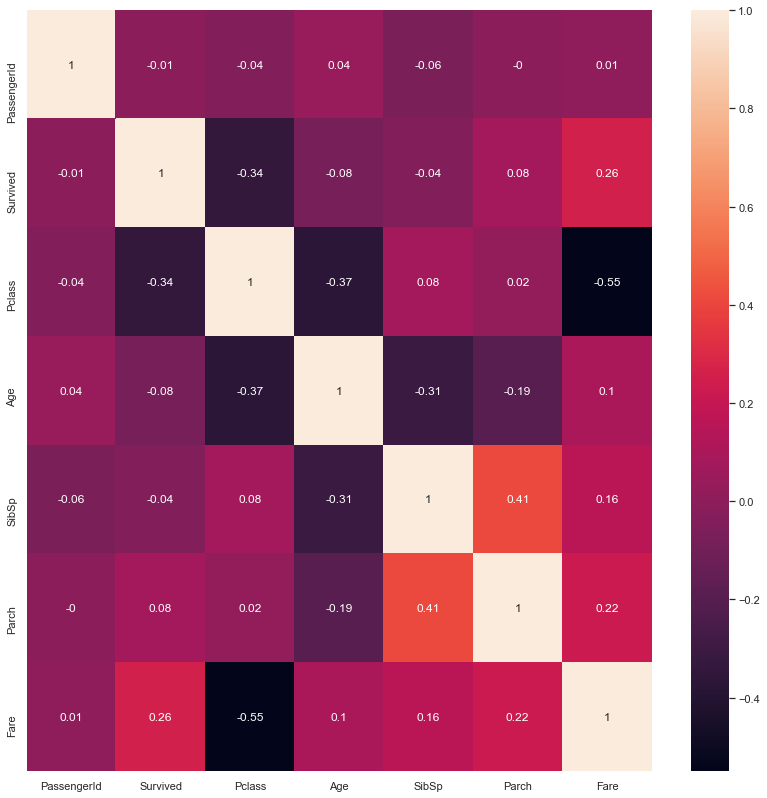

In [122]:
correlation_matrix = data_train.corr().round(2)     
sns.set(rc={'figure.figsize':(14,14)})
sns.heatmap(data=correlation_matrix, annot=True)

/Users/egorkuprasin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/egorkuprasin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/egorkuprasin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

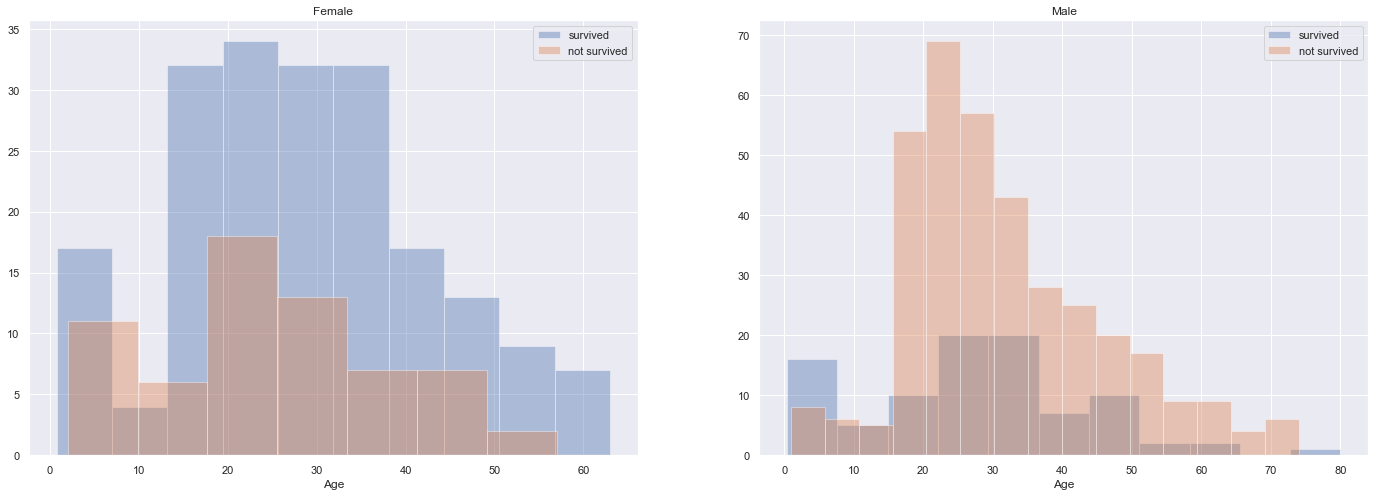

In [123]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(24, 8))
women = data_train[data_train['Sex']=='female']
men = data_train[data_train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(),  label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(),  label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(),  label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(),  label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [124]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [125]:
# drop unnecessary columns, we don't use them
data_train = data_train.drop(['PassengerId','Name','Ticket', 'Embarked', 'Cabin'], axis=1)
data_test = data_test.drop(['PassengerId','Name','Ticket', 'Embarked', 'Cabin'], axis=1)

In [127]:
data_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [128]:
data_test["Fare"].fillna(data_test["Fare"].median(), inplace=True)
data_test['Fare'] = data_test['Fare'].astype(int)
data_test['Fare'] = data_test['Fare'].astype(int)


In [129]:
data_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [130]:
average_age_titanic   = data_train["Age"].mean()
std_age_titanic       = data_train["Age"].std()
count_nan_age_titanic = data_train["Age"].isnull().sum()

average_age_test   = data_test["Age"].mean()
std_age_test       = data_test["Age"].std()
count_nan_age_test = data_test["Age"].isnull().sum()

rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

data_train["Age"][np.isnan(data_train["Age"])] = rand_1
data_test["Age"][np.isnan(data_test["Age"])] = rand_2

data_train['Age'] = data_train['Age'].astype(int)
data_test['Age']    = data_test['Age'].astype(int)

<ipython-input-130-36494612e7be>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train["Age"][np.isnan(data_train["Age"])] = rand_1
<ipython-input-130-36494612e7be>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["Age"][np.isnan(data_test["Age"])] = rand_2


In [131]:
data_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [132]:
data_train['Family'] =  data_train["Parch"] + data_train["SibSp"]
data_train['Family'].loc[data_train['Family'] > 0] = 1
data_train['Family'].loc[data_train['Family'] == 0] = 0

data_test['Family'] = data_test["Parch"] + data_test["SibSp"]
data_test['Family'].loc[data_test['Family'] > 0] = 1
data_test['Family'].loc[data_test['Family'] == 0] = 0

data_train = data_train.drop(['SibSp','Parch'], axis=1)
data_test    = data_test.drop(['SibSp','Parch'], axis=1)

/Users/egorkuprasin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/egorkuprasin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/egorkuprasin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

In [133]:
data_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Family'], dtype='object')

In [134]:
genders = {"male": 0, "female": 1}
data = [data_train, data_test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [135]:
data_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Family'], dtype='object')

In [136]:
pclass_dummies_train  = pd.get_dummies(data_train['Pclass'])
pclass_dummies_train.columns = ['Class_1','Class_2','Class_3']

pclass_dummies_test  = pd.get_dummies(data_test['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']

data_train.drop(['Pclass'],axis=1,inplace=True)
data_test.drop(['Pclass'],axis=1,inplace=True)

data_train = data_train.join(pclass_dummies_train)
data_test    = data_test.join(pclass_dummies_test)

In [142]:
data_train['Fare'] = data_train['Fare'].astype(int)

In [143]:
data_train

,Survived,Sex,Age,Fare,Family,Class_1,Class_2,Class_3
0,0,0,22,7,1,0,0,1
1,1,1,38,71,1,1,0,0
2,1,1,26,7,0,0,0,1
3,1,1,35,53,1,1,0,0
4,0,0,35,8,0,0,0,1
...,...,...,...,...,...,...,...,...
886,0,0,27,13,0,0,1,0
887,1,1,19,30,0,1,0,0
888,0,1,38,23,1,0,0,1
889,1,0,26,30,0,1,0,0


In [144]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Sex       891 non-null    int64
 2   Age       891 non-null    int64
 3   Fare      891 non-null    int64
 4   Family    891 non-null    int64
 5   Class_1   891 non-null    uint8
 6   Class_2   891 non-null    uint8
 7   Class_3   891 non-null    uint8
dtypes: int64(5), uint8(3)
memory usage: 37.5 KB


In [145]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Sex      418 non-null    int64
 1   Age      418 non-null    int64
 2   Fare     418 non-null    int64
 3   Family   418 non-null    int64
 4   Class_1  418 non-null    uint8
 5   Class_2  418 non-null    uint8
 6   Class_3  418 non-null    uint8
dtypes: int64(4), uint8(3)
memory usage: 14.4 KB


In [146]:
X_train = data_train.drop("Survived",axis=1)
Y_train = data_train["Survived"]
X_test  = data_test.copy()

In [154]:
model = RandomForestClassifier(max_depth=7, n_estimators=700)
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=7, n_estimators=700)

In [156]:
Y_pred = model.predict(X_test)
model.score(X_train, Y_train)

0.8933782267115601

In [160]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

forest_model = RandomForestClassifier()

grid_search = GridSearchCV(estimator=forest_model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  1.3min finished


{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 200}


In [161]:
pred = best_grid.predict(X_test)
best_grid.score(X_train, Y_train)

0.8877665544332211

In [169]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [170]:
knn =  KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors' : [2, 3, 4, 5, 6, 7, 8, 11], 
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}
knn_grid_search = GridSearchCV(estimator=knn, param_grid = knn_param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [171]:
knn_grid_search.fit(X_train, Y_train)
print(knn_grid_search.best_params_)
knn_best_grid = knn_grid_search.best_estimator_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
/Users/egorkuprasin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  73 out of  96 | elapsed:    1.4s remaining:    0.4s


{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    1.6s finished


In [172]:
knn_pred = knn_best_grid.predict(X_test)
knn_best_grid.score(X_train, Y_train)

0.8428731762065096